In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

Create empty GeoDataFrame

In [3]:
newdata = gpd.GeoDataFrame()

In [4]:
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


A geodataframe is basically a pandas DataFrame that should have one column dedicated for geometries. By default, the geometry-column should be named geometry (geopandas looks for geometries from this column).

Create a geometry column

In [5]:
#create a new column called geometry to to the GeoDataFrame
newdata['geometry'] = None

In [6]:
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [7]:
#coordinates of the helsinki senate square in decimal degrees
coordinates = [ (24.950899, 601.169158), (24.953492, 60.169158), (24.953510,60.170104), (24.950958, 60.169990)]

In [8]:
#CREATE a shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

In [9]:
print(poly)

POLYGON ((24.950899 601.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 601.169158))


Insert polygon into our geometry column of GeoDataFrame on the first row

In [10]:
#insert the polygon into 'geometry' -column at row 0
newdata.at[0,'geometry'] = poly

In [11]:
print(newdata)

                                            geometry
0  POLYGON ((24.951 601.169, 24.953 60.169, 24.95...


Add another column to our GeoDataFrame called location with text sanaatintori to describe location of the feature

In [12]:
#add a new column and insert data
newdata.at[0,'location'] = 'Senaatintori'

In [13]:

#Let's chek the data
print(newdata)

#we have additional information that is useful for recognicing what the feature represents.

                                            geometry      location
0  POLYGON ((24.951 601.169, 24.953 60.169, 24.95...  Senaatintori


Before exporting the data it is always good (basically necessary) to determine the coordinate reference system (projection) for the GeoDataFrame. 

In [15]:
#crs of GeoDataFrame is none because the data frame was created from scratch.
print(newdata.crs) 

None


Add a crs for our GeoDataFrame. We passed the coordinates as latitude and longitude decimal degrees, so the correct CRS is WGS84 (epsg code: 4326).
The CRS information is necessary for creating a .prj file for our output Shapefile.

In [18]:
#Add CRS definition to newdata in wkt format

#Set the GeoDataFrame coordinate system to WGS84 (i.e. epsg code = 4326)
newdata.crs = CRS.from_epsg(4326).to_wkt()

In [19]:
#Determine the output path for the shapefile
outfp = "L2_data/Senaatintori.shp"

#write the data into the shapefile
newdata.to_file(outfp)

C:\Users\aly\AppData\Local\Continuum\anaconda3\envs\python-gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Now we have successfully created a Shapefile from scratch using only Python programming. Similar approach can be used to for example to read coordinates from a text file (e.g. points) and create Shapefiles from those automatically.

Check the output Shapefile by reading it with geopandas and make sure that the attribute table and geometry seems correct.

In [20]:
#read shapefile
testdata = gpd.read_file(outfp)
print(testdata)

       location                                           geometry
0  Senaatintori  POLYGON ((24.95090 601.16916, 24.95349 60.1691...


<AxesSubplot:>

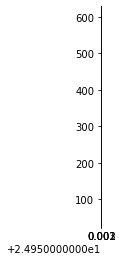

In [22]:
#visual inspection of the data
testdata.plot()

Re-project the data to ETRS-TM35FIN (EPSG:3067) and save into a new file!

In [23]:
testdata.crs = CRS.from_epsg(3067).to_wkt()

<AxesSubplot:>

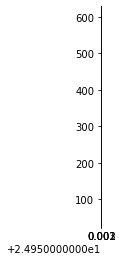

In [24]:
testdata.plot()

In [25]:
#Determine the output path for the shapefile
outfp = "L2_data/Senaatintori_EPSG3067.shp"

#write the data into the shapefile
testdata.to_file(outfp)

C:\Users\aly\AppData\Local\Continuum\anaconda3\envs\python-gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
